# Here, we analyse the movie data of top 1000 films by IMDB(Internet Movie Database) rating. We intend to focus on the following major points:

## 1) What type of movies receive the highest rating on average?
## 2) What type of movies do the audience actually prefer?
## 3) Is there any agreement between the votes that movies get and the rating they receive?
## 4) Do the movie review system agree with the ratings?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Data Analysis\\IMDB_movie_reviews_details.csv")
df.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   name        1000 non-null   object 
 2   year        1000 non-null   object 
 3   runtime     1000 non-null   int64  
 4   genre       1000 non-null   object 
 5   rating      1000 non-null   float64
 6   metascore   841 non-null    float64
 7   timeline    1000 non-null   object 
 8   votes       1000 non-null   object 
 9   gross       829 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [4]:
df2 = df.drop(columns=["timeline", "gross"])
df2

,Unnamed: 0,name,year,runtime,genre,rating,metascore,votes
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,"2,394,059"
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,"1,658,439"
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"78,266"
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,"2,355,907"
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,"1,152,912"
...,...,...,...,...,...,...,...,...
995,995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,"169,575"
996,996,Giant,1956,201,"Drama, Western",7.6,84.0,"34,759"
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,"37,753"
998,998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"44,086"


In [5]:
df2["votes"] = df2["votes"].str.replace(",", "")

In [6]:
df2.votes = df2.votes.astype("int64")

In [7]:
df2 = df2.drop(2)  #Removing a misleading data point
df2

,Unnamed: 0,name,year,runtime,genre,rating,metascore,votes
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2394059
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,1658439
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,2355907
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,1152912
5,5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,706079
...,...,...,...,...,...,...,...,...
995,995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,169575
996,996,Giant,1956,201,"Drama, Western",7.6,84.0,34759
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,37753
998,998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,44086


In [8]:
df2.set_index("name")
df2.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,votes
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2394059
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,1658439
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,2355907
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,1152912
5,5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,706079


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

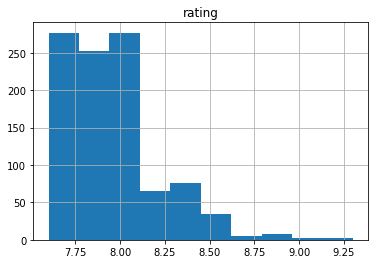

In [9]:
df2.hist(column="rating")

# Wow, there are a lot of movies rated between 7.6 and 8.2. Looks like the really high rated movies are quite rare. 

In [10]:
df2["votes"].corr(df2["rating"])

0.49136470599666887

In [11]:
df2[df2["rating"] >= 8.25]["votes"].mean()


694884.7906976744

In [12]:
df2[df2["rating"] >= 8.25]["votes"].std()


553824.2047171121

In [13]:
df2[df2["rating"] < 8.25]["votes"].mean()


217666.45747126438

In [14]:
df2[df2["rating"] < 8.25]["votes"].std()


231996.19556523618

In [15]:
df2.groupby(by="rating").votes.mean().sort_values(ascending = False)


rating
9.3    2.394059e+06
9.2    1.658439e+06
8.8    1.650211e+06
8.9    1.590382e+06
9.0    1.404966e+06
8.7    1.275524e+06
8.6    8.788231e+05
8.5    6.863809e+05
8.4    5.229749e+05
8.3    4.295347e+05
8.2    2.766262e+05
8.1    2.529941e+05
8.0    2.357611e+05
7.6    2.123539e+05
7.9    1.975610e+05
7.7    1.908906e+05
7.8    1.897727e+05
Name: votes, dtype: float64

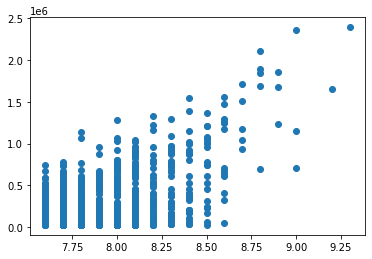

In [16]:
plt.scatter(df2["rating"], df2["votes"])

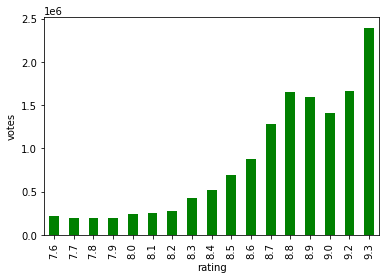

In [24]:
b = df2.groupby(by="rating").votes.mean()
b.plot.bar(ylabel = "votes", color='green')
plt.show()

# The connection between ratings and votes the movies receive look interesting. For the lower rated films, people do tend to give a lower vote count. But, for the higher rated films(rated 8.25+), though the votes received are also higher on average, there seems to be a lot of opinion difference.

In [18]:
df2.groupby(by="genre")["rating"].mean().sort_values(ascending = False).head(20)


genre
Animation, Drama, War           8.500000
Action, Sci-Fi                  8.400000
Drama, Mystery, War             8.350000
Western                         8.325000
Drama, Fantasy, Horror          8.300000
Crime, Drama, Sci-Fi            8.300000
Comedy, Musical, Romance        8.300000
Adventure, Mystery, Thriller    8.300000
Mystery, Romance, Thriller      8.300000
Drama, Musical                  8.300000
Drama, Family, Sport            8.250000
Drama, Family                   8.233333
Comedy, Music, Romance          8.200000
Adventure, Drama, War           8.200000
Comedy, Romance, War            8.200000
Crime, Drama, Music             8.200000
Drama, Fantasy, History         8.200000
Action, Adventure, Fantasy      8.200000
Drama, Fantasy, War             8.200000
Action, Adventure               8.180000
Name: rating, dtype: float64

# Drama films tend to get higher IMDB ratings! 

In [19]:
df2.groupby(by="genre")["votes"].mean().sort_values(ascending = False).head(20)

genre
Action, Sci-Fi                1.176170e+06
Action, Adventure             9.417472e+05
Adventure, Drama, Sci-Fi      9.352257e+05
Action, Adventure, Fantasy    8.717987e+05
Action, Drama, Sci-Fi         8.571480e+05
Crime, Drama, Sci-Fi          7.696870e+05
Adventure, Drama, War         7.520995e+05
Comedy, Crime, Sport          7.453920e+05
Drama, Romance, Sci-Fi        7.403395e+05
Action, Adventure, Sci-Fi     7.109613e+05
Adventure, Fantasy            6.889800e+05
Action, Adventure, Drama      6.795684e+05
Action, Sci-Fi, Thriller      6.749165e+05
Drama, Fantasy, War           6.276500e+05
Action, Adventure, Mystery    5.908060e+05
Mystery, Sci-Fi, Thriller     5.859220e+05
Adventure, Thriller           5.499240e+05
Adventure, Comedy, Sci-Fi     5.434180e+05
Action, Mystery, Thriller     5.216563e+05
Adventure, Comedy, Fantasy    5.177640e+05
Name: votes, dtype: float64

# But people want more of the adventure and action films!

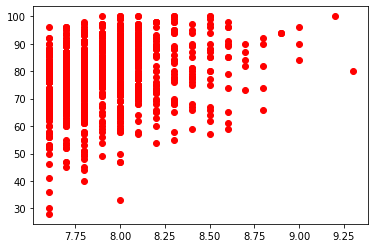

In [20]:
plt.scatter(df2["rating"], df2["metascore"], color='red')

In [21]:
df2.groupby(by='rating').metascore.mean().sort_values(ascending = False)


rating
9.2    100.000000
8.9     94.000000
9.0     90.000000
8.7     83.200000
8.3     83.085714
8.5     82.714286
8.1     82.414894
8.6     82.153846
8.2     80.951220
7.9     80.933333
8.8     80.800000
8.4     80.523810
9.3     80.000000
8.0     79.077586
7.7     75.827815
7.8     75.725191
7.6     71.654545
Name: metascore, dtype: float64

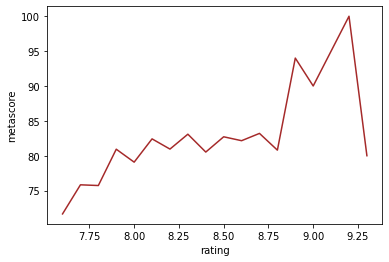

In [25]:
c = df2.groupby(by='rating').metascore.mean()
c.plot(ylabel = "metascore", color='brown')
plt.show()

In [23]:
df2.groupby(by="rating").metascore.min()

rating
7.6     28.0
7.7     45.0
7.8     40.0
7.9     49.0
8.0     33.0
8.1     57.0
8.2     54.0
8.3     55.0
8.4     59.0
8.5     57.0
8.6     59.0
8.7     73.0
8.8     66.0
8.9     94.0
9.0     84.0
9.2    100.0
9.3     80.0
Name: metascore, dtype: float64

# Metascore is a balanced, aggregate score awarded to movies by Metacritic. The usual convention is:

## 81 - 100   "Universal Acclaim"
## 61 - 80     "Favorable reviews"
## 40 - 60     "Average reviews"
## 20 - 39     "Unfavorable reviews"
## 0 - 19       "Intense dislike"

# For this data, we see that though the higher rated movies have a great metascore on average, there are some films which are higher rated but have a poor metascore. This does lead us to reconsider the high difference of opinion among the audience in case of votes. It seems that there are some higher rated movies which fail to meet expectations.